In [1]:
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns;sns.set()

C:\Users\dell\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dell\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture: A Probability density estimator

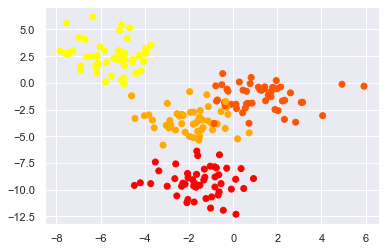

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, centers = 4, cluster_std= 1.2, random_state = 2)
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'autumn')

In [10]:
model = GaussianMixture(n_components=4)
model.fit(X)
model.predict_proba(X).round(2)

array([[0.  , 0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.99, 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.64, 0.  , 0.36, 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.98, 0.  , 0.02, 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.51, 0.  , 0.49, 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.01, 0.  , 0.99, 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.05, 0.  , 0.95, 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.98, 0.  , 0.02, 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.1 , 0.  , 0.9 , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.05, 0.95, 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.

## Chosing the number of components

In [15]:
%%HTML
<style>
mark {
    background: teal;
    color: white;
}
</style>
<h2>Use Akaike information criterion (AIC) and Baysian information criterion (BIC)</h2>
<h3>Chose the number of components that minimize <mark>AIC</mark> and <mark>BIC</mark> </h3>

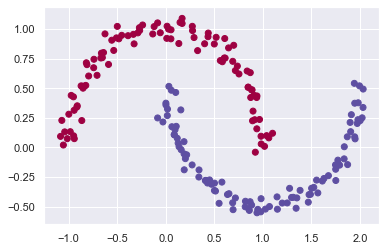

In [17]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200, noise = .05)
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'Spectral')

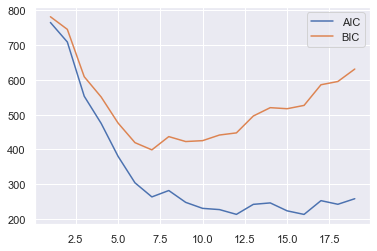

In [21]:
component_values = range(1, 20)
models = [GaussianMixture(n_components = n).fit(X) for n in component_values]
aics = [model.aic(X) for model in models]
bics = [model.bic(X) for model in models]
plt.plot(component_values, aics, label = 'AIC')
plt.plot(component_values, bics, label = 'BIC')
plt.legend()

## GMM for generating new data

Text(0, 0.5, 'Cumulative explained variance ratio')

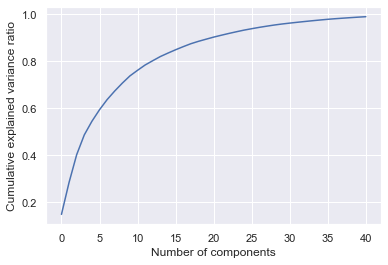

In [23]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
digits = load_digits()
transformer = PCA(.99)
digits_pca = transformer.fit_transform(digits.data)
plt.plot(range(transformer.n_components_), np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')

In [25]:
%%HTML
<h3>Find the best <mark>#components</mark> for Gaussian Mixture Model</h3>

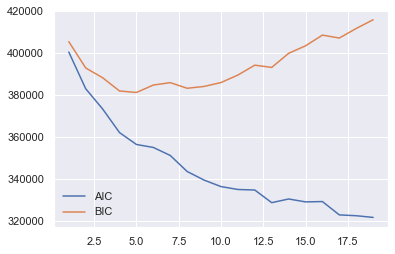

In [27]:
values = range(1, 20)
models = [GaussianMixture(n_components = n).fit(digits_pca) for n in values]
plt.plot(values, [model.aic(digits_pca) for model in models], label = 'AIC')
plt.plot(values, [model.bic(digits_pca) for model in models], label = 'BIC')
plt.legend(frameon = False)

In [30]:
%%HTML
<p>From the above figure, we can clearly see that the number of components that minimize <mark>AIC</mark> and <mark>BIC</mark> is <b>5</b></p>

In [36]:
%%HTML
<p>Sample for Gaussian Mixture the lower dimensional representation of digits on transform it to higher dimensional space by using <mark>PCA.inverse_transform()</mark></p>

In [42]:
model = GaussianMixture(n_components = 5)
model.fit(digits_pca)

new_digits_pca, corresponding_clusters = model.sample(36)
new_digits = transformer.inverse_transform(new_digits_pca)


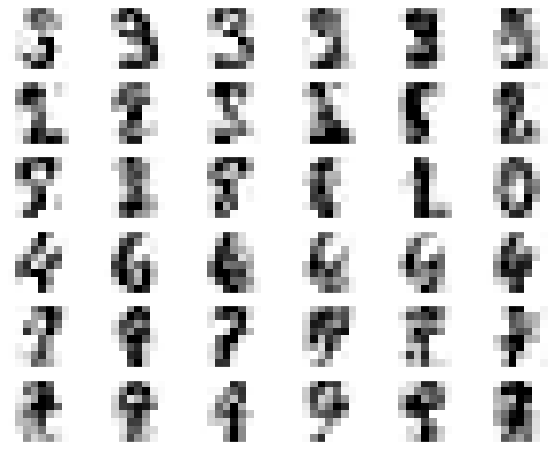

In [44]:
fig, axes = plt.subplots(6,6,figsize = (10, 8), subplot_kw = {'xticks' : [], 'yticks' : []})
for i, ax in enumerate(axes.flat):
    digit = new_digits[i].reshape((8,8))
    im = ax.imshow(digit, cmap = 'binary', interpolation = 'nearest')
    im.set_clim(0, 16)
